# Clearmap Package

Paper for reference: http://www.cell.com/cell/fulltext/S0092-8674(16)30555-4

Software documentation: https://rawgit.com/ChristophKirst/ClearMap/master/docs/_build/html/index.html

## Importing necessary packages

In [1]:
%matplotlib inline

In [19]:
import ClearMap.IO as io
import ClearMap.Settings as settings
from ClearMap.ImageProcessing.CellDetection import detectCells
import ClearMap.ImageProcessing.SpotDetection as sd
import ClearMap.Visualization.Plot as viz
import os
import numpy as np
import matplotlib.pyplot as plt

In [20]:
plt.rcParams['figure.figsize'] = 16,9

## Running Spot Detection

In [21]:
fn = 'ailey/s3617_cells_subvolume.tif'
img = io.readData(fn)
img = img.astype('uint16') # converting data to smaller integer types can be more memory efficient!
parameters = {"filterDoGParameter" : {"size": (5,5,5)}, "findExtendedMaximaParameter" : {"threshold" : 5}, "verbose": True};
res = sd.detectSpots(img, parameters);

None


In [22]:
detected_cells = res[0]

In [23]:
detected_cells.shape

(238002, 3)

## Plotting detected cells over image

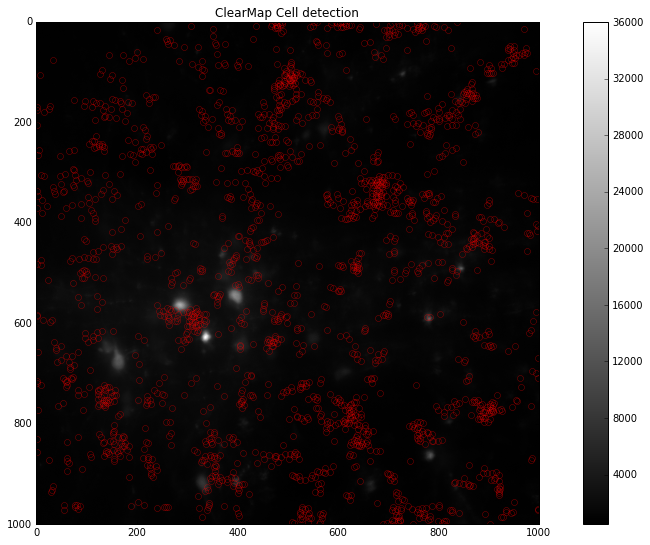

In [26]:
slice_of_interest = 10
plt.imshow(img[:,:,slice_of_interest], cmap='gray')
plt.colorbar()
for i in detected_cells[np.where(detected_cells[:,-1] == slice_of_interest)][:,0:2]:
    plt.plot(i[0], i[1], 'o', alpha=0.5, scalex=False, scaley=False, mfc='none', mec='r')
    
plt.title("ClearMap Cell detection")
plt.show()

## Disadvantages

- Many parameters to tune and standard parameters don't provide great results
- Not very user-friendly